##### Speech Emotion recognition. A group project
Using CNN1D to classify emotion in speech
Using RAVDESS sudio only and SAVEE
Size of Dataset is more than 100 MB - Git hub link - https://github.com/jagjeet12301019/SER_CNN1D
Other links to download the dataset we have used - 

We are using two datasets - 
1.) RAVDESS - 
	a.)This can be downloaded directly from Zenodo
	b.)We require to donload only audio part
		- 1st audio file - https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip?download=1
		- 2nd audio file - https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1

2.) SAVEE - This can be downloaded directly from Kahlan website after making an acoount-
Further all the data from 4 folders should be combined into one as we did in this project-
Link to download SAVEE - http://kahlan.eps.surrey.ac.uk/savee/Data/AudioData/


In [31]:
import os
import sys

#Main python library to work with audio files
import librosa
import librosa.display

import pandas as pd
import numpy as np
#Some important keras functionalities to be used in the code to create the model
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
#Seaborn to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
# Ipython we will be using to play with the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

print ("executed successfully")

executed successfully


In [32]:

#save dataset file name as below 
file_name = "Audio_Speech_Actors_01-24"
file_nameS = "ALL"
file_nameT = "TESS2"
#save path of dataset in to a variable
Ravdess = os.path.join(os.getcwd(),file_name)
Savee = os.path.join(os.getcwd(),file_nameS)
Tess = os.path.join(os.getcwd(),file_nameT)

print(Ravdess)
print("Executed Successfully")

C:\Users\Jagjeet\AppML\Major Project Final\Pro_1.5_All_Datasets_Spectral_with_MFCC_Only\Audio_Speech_Actors_01-24
Executed Successfully


In [33]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + '/'+ dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + dir + '/' + file)
        
# Data frame created for emotion files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Path files data frame
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

In [34]:
# Work with our second dataset
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + '/' + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# Emotions files SAVEE data frame
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Path files SAVEE data frame
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
print("Executed Successsfully")

Executed Successsfully


In [35]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + '/' + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/' + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  C:\Users\Jagjeet\AppML\Major Project Final\Pro...
1    angry  C:\Users\Jagjeet\AppML\Major Project Final\Pro...
2    angry  C:\Users\Jagjeet\AppML\Major Project Final\Pro...
3    angry  C:\Users\Jagjeet\AppML\Major Project Final\Pro...
4    angry  C:\Users\Jagjeet\AppML\Major Project Final\Pro...

In [36]:
# Combine both datasets in to one
data_path = pd.concat([Ravdess_df, Savee_df,Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
print("Executed Succssfully")

Executed Succssfully


In [37]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

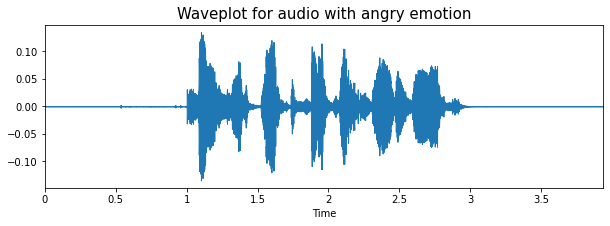

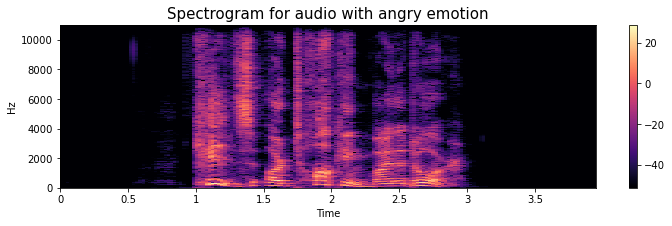

In [38]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

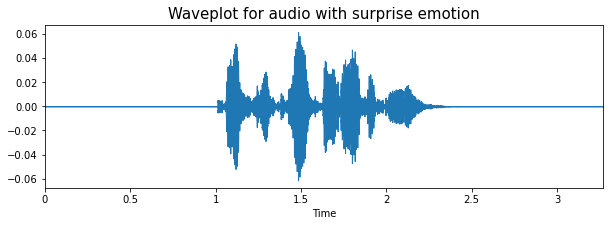

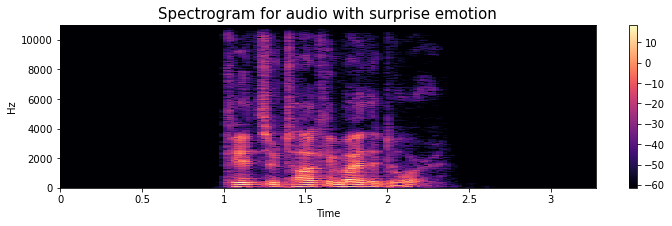

In [39]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

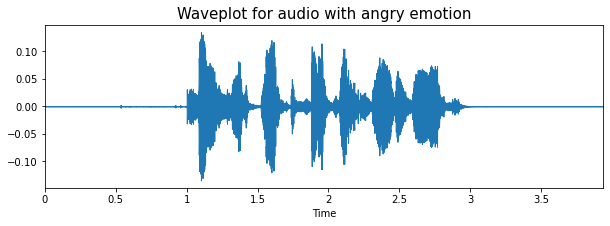

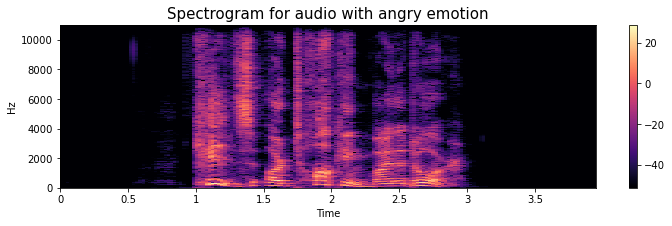

In [40]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

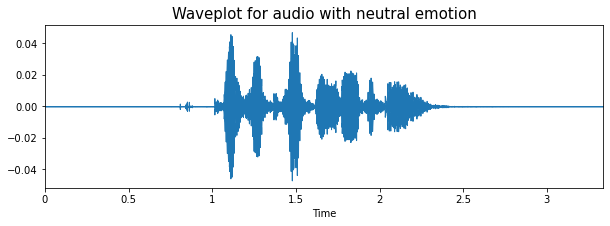

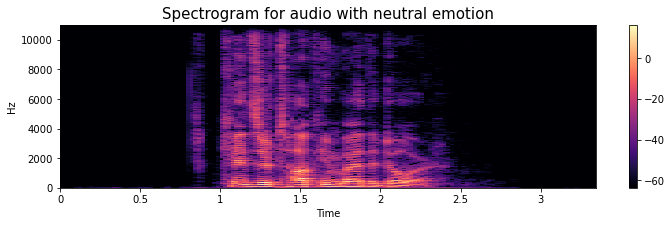

In [41]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

Data augmentation

In [42]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

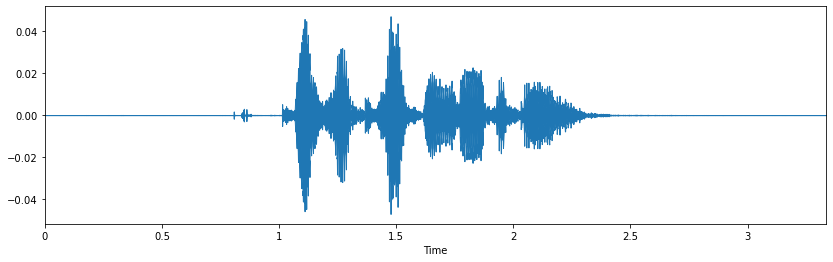

In [43]:
#Normal view
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

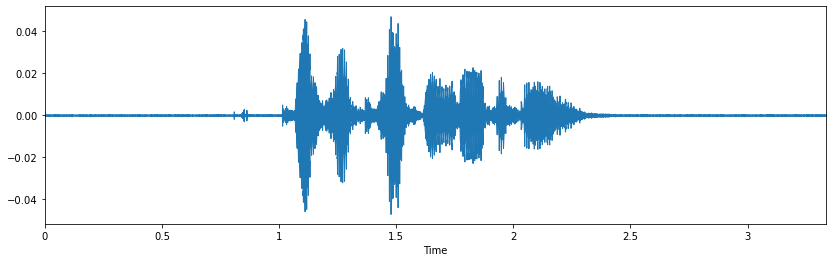

In [44]:
#Add noise in the data
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

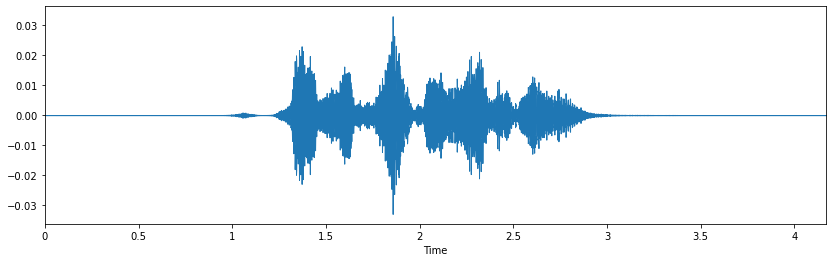

In [45]:
#apply stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

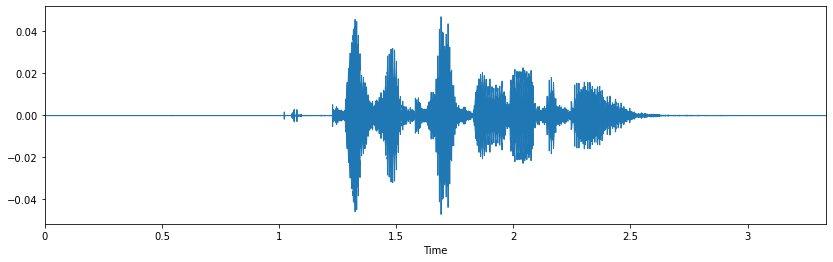

In [46]:
#shift apply
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

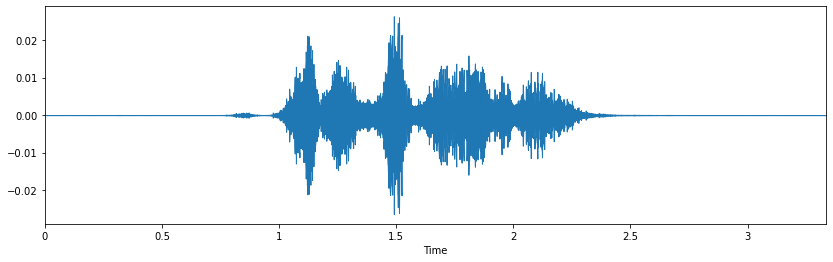

In [47]:
#Pitching
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [48]:
def extract_features(data):
    result = np.array([])
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    res1 = extract_features(data)
    result = np.array(res1)
    
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))
    
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

print("executed successfully")

executed successfully


In [49]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)
print("Executed")

Executed


In [50]:
len(X), len(Y), data_path.Path.shape

(14160, 14160, (4720,))

In [51]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0          1         2          3          4         5         6  \
0 -646.141479  73.066620  0.403144  16.848043   9.805768  1.096762 -4.758567   
1 -429.458682  28.608018  8.863842   9.225848   5.076203 -0.533869 -3.081396   
2 -708.562500  69.492767 -1.611554  17.750738   7.005463 -0.331621 -8.311800   
3 -634.959839  72.811478 -3.487027  20.697269  10.188319 -0.667841 -3.293634   
4 -480.656781  36.800082  6.878371  12.434414   6.090565 -1.648104 -3.295304   

          7          8         9  ...        11        12        13        14  \
0 -3.821855 -14.999225 -3.379040  ... -3.628367  2.119565 -4.571883  0.182455   
1 -6.125158  -7.909724 -5.541998  ... -1.793297 -1.798570 -1.273860 -0.059411   
2 -6.556766 -17.368713 -0.728383  ... -3.098578  0.685355 -5.102877 -0.051809   
3 -7.447817 -16.703850 -2.161060  ... -3.714515  0.273591 -4.517450 -1.117245   
4 -7.684194 -11.508819 -5.577454  ... -2.668706 -1.895047 -2.536346 -0.681682   

         15        16        17        18        19   labels  
0  1.418681 -5.783636 -2.084638 -2.130159 -0.869078  neutral  
1 -0.587107 -3.412511 -2.228201  0.019389 -2.244999  neutral  
2 -2.975881 -6.936679 -1.737195 -2.334923 -4.731784  neutral  
3  0.534380 -6.885534 -1.295200 -3.289555  0.756877  neutral  
4 -0.802904 -4.588350 -3.407041 -0.843488 -2.040608  neutral  

[5 rows x 21 columns]

In [52]:
#Data Preperation-
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [53]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [54]:
# splitting data in to Train and Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10620, 20), (10620, 8), (3540, 20), (3540, 8))

In [55]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10620, 20), (10620, 8), (3540, 20), (3540, 8))

In [56]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10620, 20, 1), (10620, 8), (3540, 20, 1), (3540, 8))

# Create Model now

In [57]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 20, 256)           1536      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 256)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 10, 256)           327936    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 256)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 5, 128)            163968    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 3, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 128)           

In [58]:
learning_Reduce = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[learning_Reduce])

Epoch 1/50
166/166 [==============================] - 37s 222ms/step - loss: 1.7338 - accuracy: 0.3258 - val_loss: 1.3644 - val_accuracy: 0.5133
Epoch 2/50
166/166 [==============================] - 34s 203ms/step - loss: 1.3641 - accuracy: 0.5044 - val_loss: 1.0886 - val_accuracy: 0.5884
Epoch 3/50
166/166 [==============================] - 34s 202ms/step - loss: 1.1502 - accuracy: 0.5842 - val_loss: 1.0124 - val_accuracy: 0.6288
Epoch 4/50
166/166 [==============================] - 34s 203ms/step - loss: 1.0333 - accuracy: 0.6196 - val_loss: 0.8484 - val_accuracy: 0.6887
Epoch 5/50
166/166 [==============================] - 34s 204ms/step - loss: 0.9190 - accuracy: 0.6587 - val_loss: 0.8413 - val_accuracy: 0.6958
Epoch 6/50
166/166 [==============================] - 33s 200ms/step - loss: 0.8638 - accuracy: 0.6792 - val_loss: 0.7750 - val_accuracy: 0.7102
Epoch 7/50
166/166 [==============================] - 33s 201ms/step - loss: 0.8106 - accuracy: 0.7030 - val_loss: 0.7494 - val_ac

111/111 [==============================] - 2s 14ms/step - loss: 0.7829 - accuracy: 0.8500
Final overall Accuracy for Test :  85.00000238418579 %


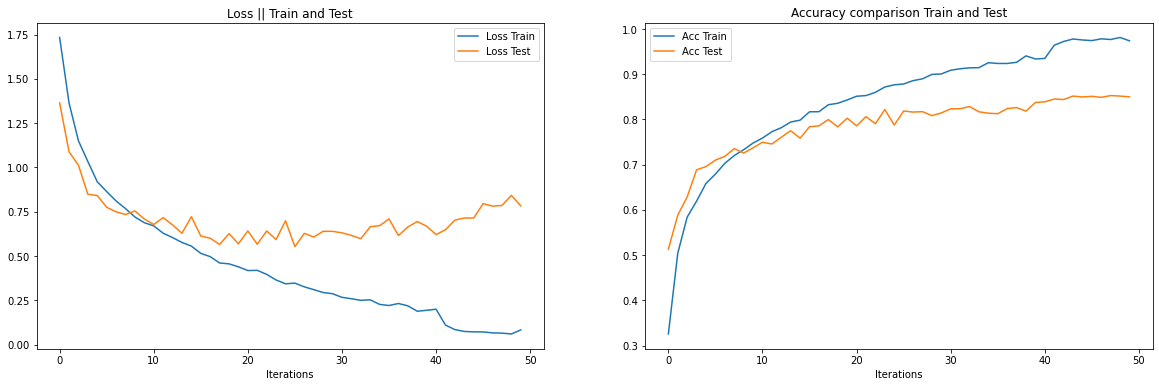

In [59]:
print("Final overall Accuracy for Test : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Loss Train')
ax[0].plot(epochs , test_loss , label = 'Loss Test')
ax[0].set_title('Loss || Train and Test')
ax[0].legend()
ax[0].set_xlabel("Iterations")

ax[1].plot(epochs , train_acc , label = 'Acc Train')
ax[1].plot(epochs , test_acc , label = 'Acc Test')
ax[1].set_title('Accuracy comparison Train and Test')
ax[1].legend()
ax[1].set_xlabel("Iterations")
plt.show()

In [63]:
# Predictions as per Test Data Samples
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)
pred_test = model.predict(x_test)
pred_test
y_test

array([['disgust'],
       ['sad'],
       ['surprise'],
       ...,
       ['neutral'],
       ['disgust'],
       ['surprise']], dtype=object)

In [64]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()
df.head(10)

Predicted Labels Actual Labels
0          disgust       disgust
1              sad           sad
2         surprise      surprise
3          disgust       disgust
4            happy         happy
5          neutral       neutral
6          disgust       neutral
7             fear          fear
8             fear          fear
9            angry         angry

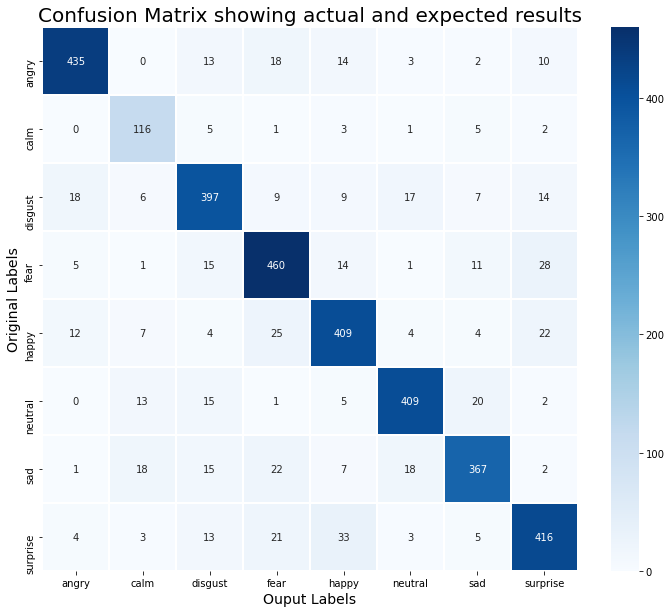

In [65]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix showing actual and expected results', size=20)
plt.xlabel('Ouput Labels', size=14)
plt.ylabel('Original Labels', size=14)
plt.show()

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.92      0.88      0.90       495
        calm       0.71      0.87      0.78       133
     disgust       0.83      0.83      0.83       477
        fear       0.83      0.86      0.84       535
       happy       0.83      0.84      0.83       487
     neutral       0.90      0.88      0.89       465
         sad       0.87      0.82      0.84       450
    surprise       0.84      0.84      0.84       498

    accuracy                           0.85      3540
   macro avg       0.84      0.85      0.84      3540
weighted avg       0.85      0.85      0.85      3540

